# MMC - Laboratorium 2 - Bartosz Sosik (310287)

## Zadanie 2

In [111]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats.distributions import chi2

### Załadowanie pliku z wygenerowanymi liczbami z C++

Użyto "dobrego" generatora Ranlux48_base oraz "złego" Minstd_rand.

In [112]:
df = pd.read_csv('Z2_count_1000000.csv', sep=';')
df.head()

,Minstd_rand,Ranlux48_base
0,6.821680,8.27435
1,7.922950,9.05334
2,0.255639,9.47535
3,0.086957,5.74136
4,8.294940,6.51323


### Funkcja do rysowania histogramów

In [113]:
def plot_histograms(bins):
    # Teoretyczna gęstość prawdopodobieństwa
    dziedzina = np.linspace(0.0, 10.0, 10)
    oczekiwana = np.linspace(0.0, 10.0, 10)*0.0 + 0.1

    plt.ion()
    fig = plt.figure(layout='constrained', figsize=(12, 6))
    subfigs = fig.subfigures(1, 2, wspace=0.07)
    axesLeft = subfigs[0].subplots(2, 1, sharey=True)
    axRight = subfigs[1].subplots(1, 1, sharey=True)
    axesLeft[0].set_title('Generator Minstd_rand')
    axesLeft[1].set_title('Generator Ranlux48_base')
    axRight.set_title('Porównanie generatorów')
    min_plot = df['Minstd_rand'].plot.hist(bins=bins, range=(0,10), ax=axesLeft[0], edgecolor = 'black', density=True, label='z próby losowej')
    ranlux_plot = df['Ranlux48_base'].plot.hist(bins=bins, range=(0,10), ax=axesLeft[1], edgecolor = 'black', density=True, label='z próby losowej')
    zbiorczy = df.plot.hist(bins=bins, range=(0,10), ax=axRight, density=True, edgecolor = 'black', alpha=0.5)
    min_plot.set_xlabel('Wartość')
    min_plot.set_ylabel('Gęstość prawdopodobieństwa')
    ranlux_plot.set_xlabel('Wartość')
    ranlux_plot.set_ylabel('Gęstość prawdopodobieństwa')
    zbiorczy.set_xlabel('Wartość')
    zbiorczy.set_ylabel('Gęstość prawdopodobieństwa')

    axesLeft[0].plot(dziedzina, oczekiwana, 'r-', label='teoretyczna')
    axesLeft[0].legend(loc='best')
    axesLeft[1].plot(dziedzina, oczekiwana, 'r-', label='teoretyczna')
    axesLeft[1].legend(loc='best')
    axRight.plot(dziedzina, oczekiwana, 'r-', label='teoretyczna')
    axRight.legend(loc='lower right')

### Funkcje do obliczania i sprawdzania p-wartości

Test *Chi-kwadrat*. Dla rozkładu równomiernego, liczymy wartość wyrażenia $\frac{k}{n}*\sum_{i=1}^k n_i^2-n$. Ma ono sens względnego odchylenia średniokwadratowego między zaobserwowanymi "wysokościami słupków", a wartościami wynikającymi ze spodziewanego rozkładu. $k$ to liczba przedziałów, a $n_i$ - liczba obserwacji mieszczących się w $i$-tym przedziale. Jeśli rozkład rzeczywisty jest zgodny z teoretycznym, wyrażenie to powinno przyjmować małe wartości oraz mieć rozkład $\chi^{2}_{k-1}$. \
Nastepnie, po wykonaniu eksperymentu, porównujemy obliczoną wartość z dystrybuantą rozkładu $\chi^{2}_{k-1}$ i odczytujemy $p$-wartość.

In [114]:
def calculate_measure(bins, counts):
    measure = bins/sum(counts)*sum(i*i for i in counts)-sum(counts)
    return measure

def get_p_value(bins, measure, sign_level):
    p_value = chi2.sf(measure, bins-1)
    if float(p_value) < sign_level:
        out = 'Generator nie przeszedł testu!'
    else:
        out = 'Generator przeszedł test!'
    print(f'P-wartość: {p_value}')
    print(out)

### Funkcja bringup (zadanie w zależności od liczby przedziałów)

Potrzebujemy uzyskać przedziały (bins) oraz ilość obserwacji w danym przedziale (counts). Wartości te zwracane są przy rysowaniu nieznormalizowanego histogramu za pomocą metody plt.hist().

In [115]:
def Z2(bins, sign_level):
    plt.ioff()
    counts_ranlux, bins_ranlux, _ = plt.hist(df['Ranlux48_base'], bins=bins, range=(0,10))
    counts_minstd, bins_minstd, _ = plt.hist(df['Minstd_rand'], bins=bins, range=(0,10))
    
    measure_ranlux = calculate_measure(bins, counts_ranlux)
    measure_minstd = calculate_measure(bins, counts_minstd)

    print("------Ranlux-------")
    print(f'Wartość wyrażenia dla Ranlux: {measure_ranlux}')
    get_p_value(bins, measure_ranlux, sign_level)
    print("------Minstd-------")
    print(f'Wartość wyrażenia dla Minstd: {measure_minstd}')
    get_p_value(bins, measure_minstd, sign_level)


### Wyniki dla liczby przedziałów $k=11$

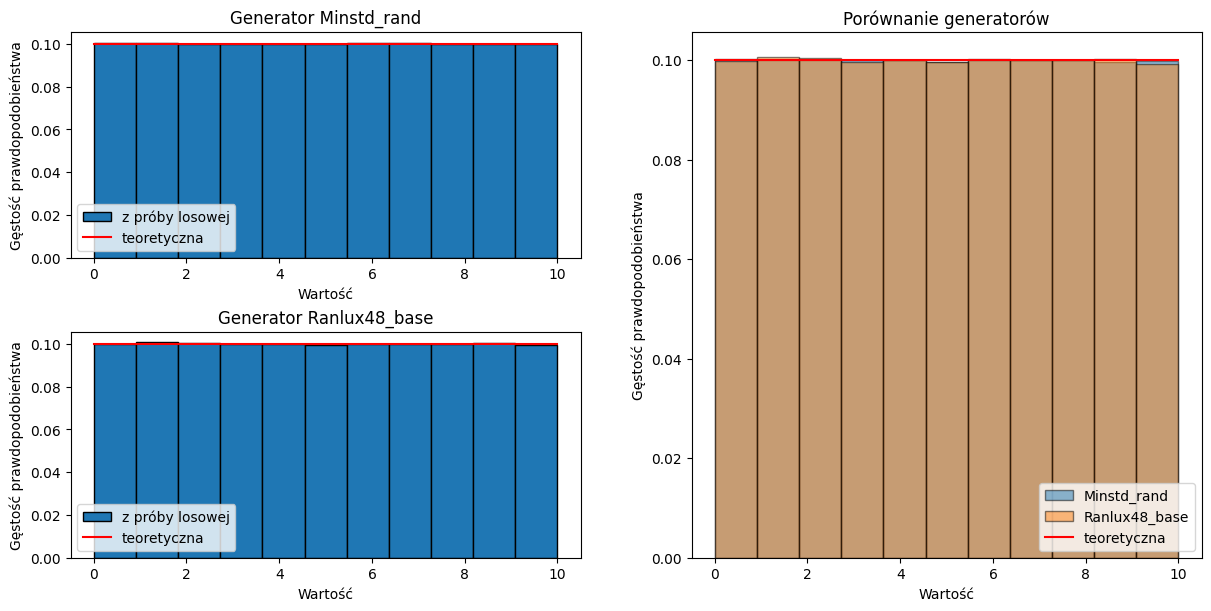

In [125]:
bins = 11
plot_histograms(bins)

In [117]:
Z2(bins, 0.05)

------Ranlux-------
Wartość wyrażenia dla Ranlux: 13.139114000019617
P-wartość: 0.21599749838244173
Generator przeszedł test!
------Minstd-------
Wartość wyrażenia dla Minstd: 3.9623419999843463
P-wartość: 0.9490298083004493
Generator przeszedł test!


### Wyniki dla liczby przedziałów $k=51$

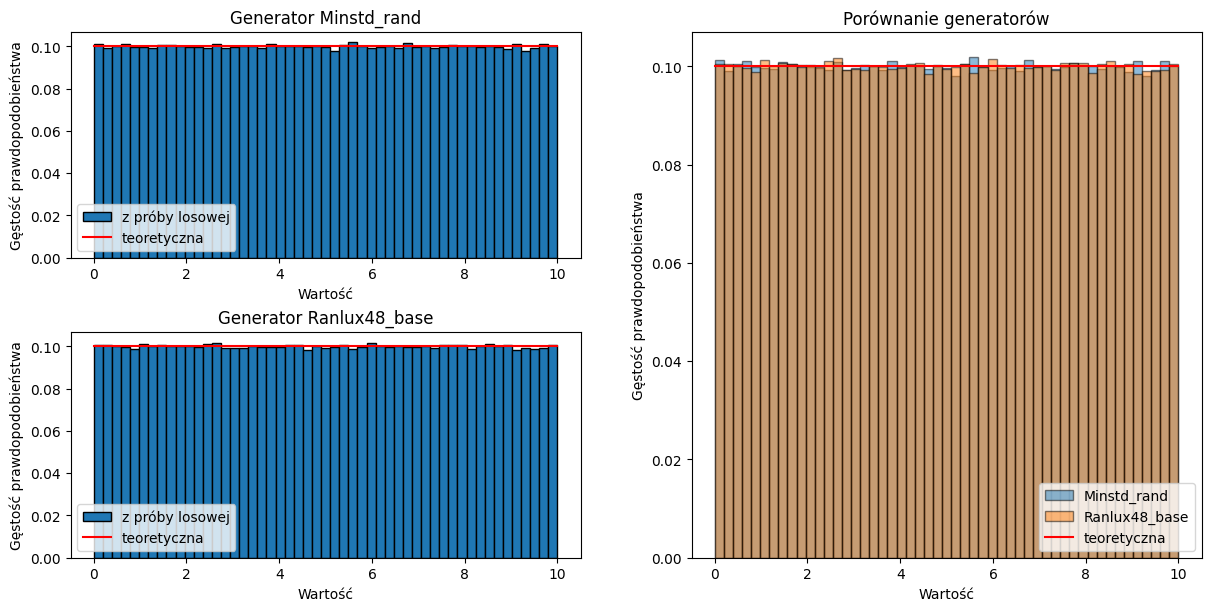

In [124]:
bins = 51
plot_histograms(bins)

In [119]:
Z2(bins, 0.05)

------Ranlux-------
Wartość wyrażenia dla Ranlux: 56.44214599998668
P-wartość: 0.24682952652527906
Generator przeszedł test!
------Minstd-------
Wartość wyrażenia dla Minstd: 59.00224399997387
P-wartość: 0.17956305159557368
Generator przeszedł test!


### Wyniki dla liczby przedziałów $k=101$

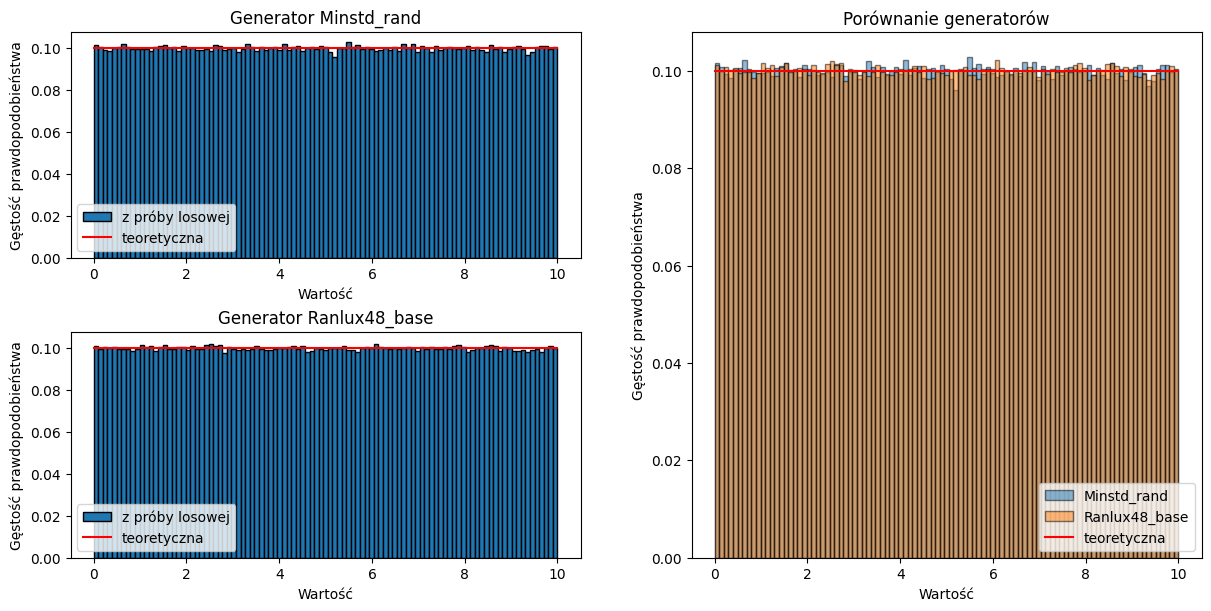

In [123]:
bins = 101
plot_histograms(bins)

In [121]:
Z2(bins, 0.05)

------Ranlux-------
Wartość wyrażenia dla Ranlux: 85.89514599996619
P-wartość: 0.8415374463003654
Generator przeszedł test!
------Minstd-------
Wartość wyrażenia dla Minstd: 130.49210000003222
P-wartość: 0.02193697800774752
Generator nie przeszedł testu!


### Wyniki
Dla ilości przedziałów $k=11$ oraz $k=51$, oba generatory przeszły test - spełniają założenia. W szczególności możemy zaobserwować, że dla małej ilości przedziałów, większą p-wartość ma "zły" generator Minstd. Dla dużej ilości przedziałów ($k=101$), generator Minstd nie przeszedł testu - jego p-wartość wyniosła 0.02. Z kolei dla generatora Ranlux, wartość ta jest wówczas stosunkowo wysoka - wynosi 0.84. Test pokazał, że generator Ranlux faktycznie jest lepszy i nawet przy coraz większym dzieleniu na przedziały, przechodzi test Chi-kwadrat. Oczywiście, gdybyśmy testy powtórzyli na innych wygenerowanych liczbach, wyniki mogłyby być inne. 

## Zadanie 3

Wyznaczenie liczby $\pi$ metodą orzeł-reszka będzie polegać na generowaniu punktu w przestrzeni 2D - (x,y). Obydwie współrzędne punktu losowane będą z rozkładu jednostajnego na przedziale [-1, 1]. Gdy takich punktów wygenerujemy dosatecznie dużo, utworzą one kwadrat o boku długości 2. W taki kwadrat może zostać wpisany okrąg o promieniu $r=1.0$. Stosunek pola okręgu, do pola kwadratu wynosi $\frac{\pi}{4}$. \
Wygenerowany punkt, albo trafi do okręgu (warunek - $x^2+y^2<=1.0$), albo poza okrąg. Ilość wystąpień obydwu sytuacji zliczamy. \
Stosunek ilości punktów w okręgu, do ilości wszystkich wygenerowanych punktów (w całym kwadracie) także powinien zbiegać do wartości $\frac{\pi}{4}$. Zatem liczbę $\pi$ oszacować można jako $\pi \approx \frac{ncircle}{n}*4$, gdzie $ncircle$ - ilość punktów w okręgu, $n$ - ilość wszystkich wygenerowanych punktów.

In [28]:
import random
from matplotlib import pyplot as plt
import math

In [100]:
count = 10000000

random.seed(3)
hits = 0
step = list()
pi_list = list()
std_list = list()
for i in range(count):
    x = random.uniform(-1.0, 1.0)
    y = random.uniform(-1.0, 1.0)
    if pow(x, 2) + pow(y, 2) <= 1.0:
        hits += 1
    # Zapisanie wyników - odchyl. standardowe, dotychczasowa estymata liczby pi - z krokiem logarytmicznym
    if math.log10(i+1).is_integer():
        if i==0: continue # Ale pierwsze pomijamy
        std = 4*math.sqrt((1/(i+1))*(hits/(i+1))*(1-hits/(i+1)))
        pi_est = (hits/(i+1))*4
        step.append(i+1)
        pi_list.append(pi_est)
        std_list.append(std)

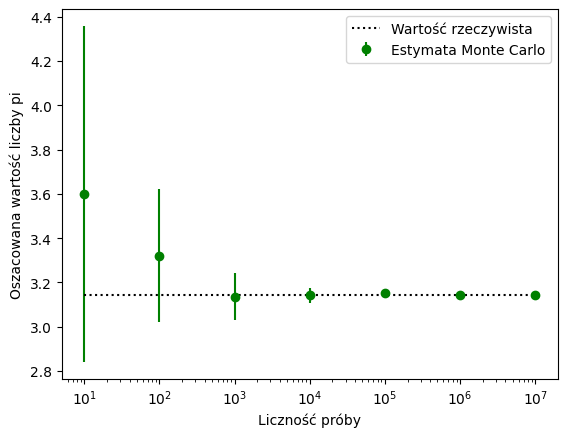

In [101]:
plt.errorbar(step, pi_list, [x*2 for x in std_list], fmt='go', label='Estymata Monte Carlo')
plt.plot([min(step), max(step)], [math.pi, math.pi], 'k:', label='Wartość rzeczywista')
plt.xscale('log')
plt.xlabel('Liczność próby')
plt.ylabel('Oszacowana wartość liczby pi')
plt.legend(loc='best')

## Wyniki
Możemy zobaczyć, że udało się dość precyzyjnie wyznaczyć liczbę $\pi$ za pomocą metody orzeł-reszka. Wraz ze zwiększającą się licznością próby, maleją przedziały niepewności, a oszacowane wartości zbliżają się do tej rzeczywistej. Już po około 10000 próbach udało się uzyskać zadowalający wynik.